In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

In [2]:
#input_dir = 'output-files-bootstrap-test7-2d'

#input_dir = 'output-files-bootstrap-test6b-2d-2a-100k'

#input_dir = 'bootstrap-simple-pdf-toy-study6b-2d-v1b'

#input_dir = 'output-files-bootstrap-test6b-2d-2a'




#input_dir = 'bootstrap-toy-study6b-2d-4c'

#input_dir = 'bootstrap-simple-pdf-toy-study6b-2d-4c'



#input_dir = 'freshtoys-simple-pdf-toy-study6b-2d-4c'

#input_dir = 'freshtoys-toy-study6b-2d-4c'



#input_dir = 'freshtoys-toy-study6b-2d-4c-save-model'

#input_dir = 'freshtoys-toy-study6b-2d-4c-save-model/freshmc-01'
#input_dir = 'freshtoys-toy-study6b-2d-4c-save-model/freshmc-02'




#input_dir = 'bootstrap-toy-study6b-1d-1a'
#input_dir = 'bootstrap-toy-study6b-1d-1a-badres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-goodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-verygoodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-perfect'

#input_dir = 'bootstrap-toy-study6b-1d-1a-nb1000'


#input_dir = 'simple-pdf-toy-study6b-1d-1a-1k'



#input_dir = 'fit-pdf-toy-study-2d-1a'

#input_dir = 'fit-pdf-toy-study-1d-1a'

#input_dir = 'hist-pdf-toy-study-1d-1b'

#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution-5k-toys'


#input_dir = 'bootstrap-toy-study8a-1d-1c'

#input_dir = 'hist-pdf-toy-study-1d-1a-perfect'
#input_dir = 'hist-pdf-toy-study-1d-1a-goodres'
#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution'
#input_dir = 'hist-pdf-toy-study-1d-1a-badres'



#input_dir = 'bootstrap-toy-study8a-1d-1d'

#input_dir = 'bootstrap-toy-study8a-1d-1d-gpu0'

#input_dir = 'bootstrap-toy-study8a-1d-1d-nominal-resolution'

#-----



#input_dir = 'hist-pdf-toy-study-1d-1a-perfect'
#input_dir = 'hist-pdf-toy-study-1d-1a-goodres'
#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution'
#input_dir = 'hist-pdf-toy-study-1d-1b-mediumbad'


#input_dir = 'bootstrap-toy-study8a-1d-1d-perfect'
#input_dir = 'bootstrap-toy-study8a-1d-1d'
#input_dir = 'bootstrap-toy-study8a-1d-1d-nominal-resolution'
#input_dir = 'bootstrap-toy-study8a-1d-1d-gpu0'



#----

#input_dir = 'bootstrap-toy-study8a-1d-2a-perfect'
#input_dir = 'bootstrap-toy-study8a-1d-2a-goodres'
#input_dir = 'bootstrap-toy-study8a-1d-2a-nominal-resolution'
#input_dir = 'bootstrap-toy-study8a-1d-2a-mediumbad'

#input_dir = 'hist-pdf-toy-study-1d-2a-perfect'
#input_dir = 'hist-pdf-toy-study-1d-2a-goodres'
#input_dir = 'hist-pdf-toy-study-1d-2a-nominal-resolution'
#input_dir = 'hist-pdf-toy-study-1d-2a-mediumbad'

#----


#input_dir = 'hist-pdf-toy-study-1d-2a'

#input_dir = 'bootstrap-toy-study8a-1d-2a'




#input_dir = 'hist-pdf-toy-study-1d-2a-discretized-data'


#----


input_dir = 'hist-pdf-toy-study-1d-3c'


with open( '%s/train-and-true-samples.npy' % input_dir, 'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    
print('\n\n')
print(' shape of train_pts:  %s' % str(train_pts.shape))
print(' shape of true_pts:   %s' % str(true_pts.shape))
print('\n\n')






 shape of train_pts:  (100000, 1)
 shape of true_pts:   (10000, 1)





In [3]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()
    

In [4]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 1




In [5]:
with open( '%s/config-pars.npy' % input_dir, 'rb') as f :
    train_mu = np.load(f, allow_pickle=True )
    train_rho = np.load(f, allow_pickle=True)
    train_sig = np.load(f, allow_pickle=True)    
    true_mu = np.load(f, allow_pickle=True )
    true_rho = np.load(f, allow_pickle=True)
    true_sig = np.load(f, allow_pickle=True)  
    resolution = np.load(f, allow_pickle=True)

<function matplotlib.pyplot.show(close=None, block=None)>

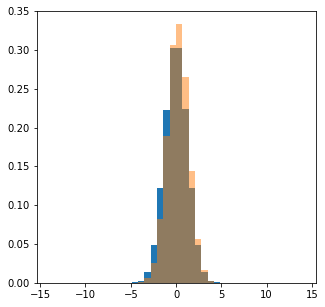

In [6]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))



hmin=-5
hmax=5


hmin=-14
hmax=14

hbins=40


for i in range(ndim) :
    if ndim > 1 :
        thisax = ax[i]
    else :
        thisax = ax
    thisax.hist( train_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True )
    thisax.hist( true_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True, alpha=0.5 )
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

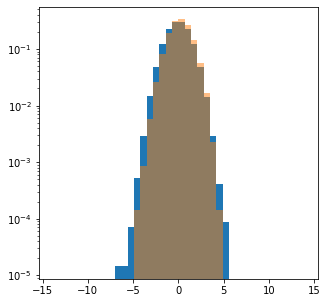

In [7]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))

hbins=40


for i in range(ndim) :
    if ndim > 1 :
        thisax = ax[i]
    else :
        thisax = ax
    thisax.hist( train_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True )
    thisax.hist( true_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True, alpha=0.5 )
    thisax.set_yscale('log')
    
plt.show

In [8]:
with open( "%s/omnifold-output-weights.npy" % input_dir,'rb') as f :
    main_sample_omnifold_weights = np.load(f)


In [9]:
main_sample_omnifold_weights = np.clip( main_sample_omnifold_weights, 1e-11, 1e11)

<function matplotlib.pyplot.show(close=None, block=None)>

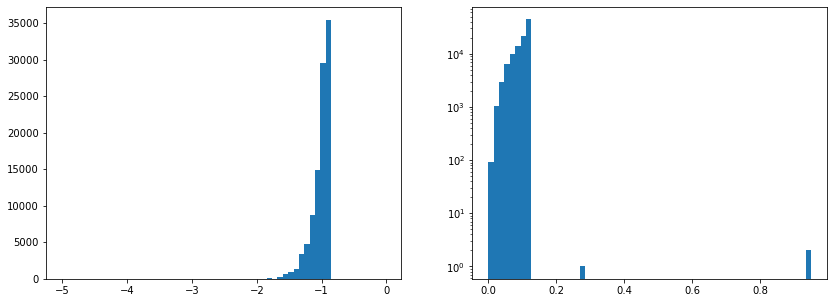

In [10]:
fig,ax = plt.subplots( 1, 2, figsize=(2*7,5))

hbins = 60
ax[0].hist( np.log10(main_sample_omnifold_weights), bins=hbins)
ax[1].hist( main_sample_omnifold_weights, bins=hbins)
ax[1].set_yscale('log')
plt.show

In [11]:
true_rho

array([[0.]])

In [12]:
true_mu.shape

(1,)

In [13]:
true_cov = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        k = ndim - j - 1
        if i == j :
            true_cov[i][j] = true_sig[i]*true_sig[i]
        elif j > i :
            print(" %d, %d, %d" % (i,j,k))
            true_cov[i][j] = true_rho[i][k] * true_sig[i] * true_sig[j]

In [14]:
true_cov

array([[0.81]])

In [15]:
have_fits = False

if exists( "%s/fit-results.npy" % input_dir ) :
    have_fits = True
    print("\n\n Have fit results file.\n\n")



 Have fit results file.




In [16]:
if have_fits :
    
    with open( '%s/fit-results.npy' % input_dir, 'rb' ) as f :
        fit_results_mean_val = np.load(f, allow_pickle=True )
        fit_results_mean_err = np.load(f, allow_pickle=True )
        fit_results_cov_val = np.load(f, allow_pickle=True )
        fit_results_cov_err = np.load(f, allow_pickle=True )        
        

    ave_fit_err_mean = np.zeros( ndim )
    
    ave_fit_err_cov = np.zeros( shape=(ndim,ndim) )

    for fi in range(ndim) :
    
        ave_fit_err_mean[fi] = np.mean( fit_results_mean_err[fi,:])
        
        print( '%d : ave fit error, mean :  %8.4f' % (fi, ave_fit_err_mean[fi]))
        
    for fi1 in range(ndim) :
        for fi2 in range(fi1,ndim) :
            
            
            ave_fit_err_cov[fi1,fi2] = np.mean( fit_results_cov_err[fi1,fi2,:])
            
            print( 'fi1, fi2 : %d, %d    ave fit error, cov : %8.4f' % (fi1,fi2, ave_fit_err_cov[fi1,fi2]))
    

0 : ave fit error, mean :    0.0091
fi1, fi2 : 0, 0    ave fit error, cov :   0.0118


In [17]:
def calc_mean( weights, fi ) :
    
    mean = ( np.sum( weights * train_pts[:,fi]) ) / ( np.sum( weights ) )
    
    return mean

In [18]:
def calc_rms( weights, fi ) :
    
    x = calc_mean( weights, fi )
    xx = ( np.sum( weights * train_pts[:,fi] * train_pts[:,fi] ) ) / ( np.sum( weights ) )
    
    #print(" x = %f,  xx = %f" % (x, xx))
    
    return np.sqrt(xx - x*x)


In [19]:
def calc_cov( weights, fi1, fi2 ) :
    
    x1 = calc_mean( weights, fi1 )
    x2 = calc_mean( weights, fi2 )
    x1x2 = ( np.sum( weights * train_pts[:,fi1] * train_pts[:,fi2] ) ) / ( np.sum( weights ) )
    
    return np.sqrt( x1x2 - x1*x2 )
    

In [20]:
def calc_mean_cov( weights, fi1, fi2 ) :

    return_dict = {}
    
    wsum = np.sum( weights )
    
    wx1 = np.sum( weights * train_pts[:,fi1] )
    wx2 = np.sum( weights * train_pts[:,fi2] )
    wx1x2 = np.sum( weights * train_pts[:,fi1] * train_pts[:,fi2] )

    x1 = wx1 / wsum
    x2 = wx2 / wsum

    x1x2 = wx1x2 / wsum
    
    cov12 = x1x2 - x1*x2

    
    return_dict["mean_x1"] = x1
    return_dict["mean_x2"] = x2
    return_dict["cov_x1x2"] = cov12    
    
    if fi1 != fi2 :
        wx1x1 = np.sum( weights * train_pts[:,fi1] * train_pts[:,fi1] )
        wx2x2 = np.sum( weights * train_pts[:,fi2] * train_pts[:,fi2] )
        cov11 = wx1x1 / wsum - x1*x1
        cov22 = wx2x2 / wsum - x2*x2

        rms1 = np.sqrt(cov11)
        rms2 = np.sqrt(cov22)
        rho12 = cov12 / (rms1*rms2)     
    
        return_dict["rho12"] = rho12
        return_dict["rms1"] = rms1
        return_dict["rms2"] = rms2
    else :
        rms1 = np.sqrt(cov12)
        return_dict["rms1"] = rms1
        
    return return_dict


    

In [21]:
n_samples = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d bootstrap samples.\n\n" % n_samples )



 Found 500 bootstrap samples.




In [22]:
%%time

all_mean = np.zeros( shape=(ndim,n_samples) )
all_rms = np.zeros( shape=(ndim,n_samples) )
all_cov = np.zeros( shape=(ndim,ndim,n_samples) )
all_rho = np.zeros( shape=(ndim,ndim,n_samples) )

all_weight_min = np.zeros( n_samples )
all_weight_max = np.zeros( n_samples )

all_weight_sum = np.zeros( n_samples )


si = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        
        print('\n----- %s exists' % fname )
        
        with open(fname,'rb') as f :
            
            final_push_weights_scaled = np.load(f)
            print( len(final_push_weights_scaled))
            print( final_push_weights_scaled )
            print( true_pts[:,0])
            
            all_weight_min[si] = np.min( final_push_weights_scaled )
            all_weight_max[si] = np.max( final_push_weights_scaled )
            
            all_weight_sum[si] = np.sum( final_push_weights_scaled )
            
            for fi1 in range(ndim) :
                for fi2 in range(fi1,ndim) :
                    mean_cov = calc_mean_cov( final_push_weights_scaled, fi1, fi2 )
                    all_cov[fi1,fi2,si] = mean_cov["cov_x1x2"]
                    all_cov[fi2,fi1,si] = mean_cov["cov_x1x2"]
                    if ( fi1 == fi2 ) :
                        print( "  %d %d  :  mean = %8.4f, RMS = %8.4f, cov = %8.4f" % 
                              (fi1, fi2, mean_cov["mean_x1"], mean_cov["rms1"], mean_cov["cov_x1x2"]))
                        all_mean[fi1,si] = mean_cov["mean_x1"]
                        all_rms[fi1,si] = mean_cov["rms1"]
                    else :
                        print( "  %d %d  :  rho = %8.4f,  cov = %8.4f" %
                              (fi1, fi2, mean_cov["rho12"], mean_cov["cov_x1x2"]) )
                        all_rho[fi1,fi2,si] = mean_cov["rho12"]
                        all_rho[fi2,fi1,si] = mean_cov["rho12"]
                        
        si = si + 1
        
            


----- hist-pdf-toy-study-1d-3c/bootstrap-weights-000.npy exists
100000
[0.07949182 0.08753234 0.10864322 ... 0.08269609 0.11245425 0.11490565]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1873, RMS =   0.9011, cov =   0.8120

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-001.npy exists
100000
[0.07766323 0.08569271 0.10700457 ... 0.0809972  0.12454044 0.11310077]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.2170, RMS =   0.9171, cov =   0.8411

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-002.npy exists
100000
[0.082928   0.09055889 0.10775671 ... 0.08577229 0.11298708 0.11178303]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1843, RMS =   0.9168, cov =   0.8405

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-003.npy exists
100000
[0.07741526 0.08536166 0.1077166  ... 0.08032539 0.1178767  0.11465708]
[ 0.73853174 

100000
[0.07916059 0.08712536 0.10643362 ... 0.08210193 0.12614088 0.11167937]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.2024, RMS =   0.9189, cov =   0.8444

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-155.npy exists
100000
[0.07828505 0.08369626 0.10506755 ... 0.08033942 0.12688685 0.11179357]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.2157, RMS =   0.9329, cov =   0.8703

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-156.npy exists
100000
[0.07959996 0.08681037 0.10879785 ... 0.0821915  0.11186145 0.11561099]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1923, RMS =   0.8911, cov =   0.7940

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-157.npy exists
100000
[0.0783924  0.08754485 0.10863165 ... 0.08183672 0.11740461 0.11331264]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]

  0 0  :  mean =   0.2144, RMS =   0.9030, cov =   0.8154

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-184.npy exists
100000
[0.08117706 0.08793875 0.10583129 ... 0.08358378 0.12413651 0.1111517 ]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1910, RMS =   0.9334, cov =   0.8712

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-185.npy exists
100000
[0.08024201 0.08632552 0.10580717 ... 0.08282886 0.12067638 0.11331524]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.2029, RMS =   0.9130, cov =   0.8336

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-186.npy exists
100000
[0.07948522 0.08670661 0.10496095 ... 0.08236986 0.1281339  0.11072895]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.2143, RMS =   0.9263, cov =   0.8580

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-187.npy exists
100000
[0.08177832 0.08821712 0.10

  0 0  :  mean =   0.2038, RMS =   0.9236, cov =   0.8531

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-345.npy exists
100000
[0.0769298  0.08571088 0.10842139 ... 0.07996057 0.11897256 0.11467924]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.2083, RMS =   0.9232, cov =   0.8523

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-346.npy exists
100000
[0.07926088 0.0877534  0.1081331  ... 0.08241637 0.11564089 0.11411535]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.2014, RMS =   0.9097, cov =   0.8276

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-347.npy exists
100000
[0.08003104 0.09071715 0.11102362 ... 0.08411848 0.10976178 0.11603947]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1889, RMS =   0.8936, cov =   0.7985

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-348.npy exists
100000
[0.08060124 0.08878461 0.10


----- hist-pdf-toy-study-1d-3c/bootstrap-weights-374.npy exists
100000
[0.08007906 0.08847541 0.10728019 ... 0.08317595 0.11580325 0.11346094]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1933, RMS =   0.9017, cov =   0.8130

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-375.npy exists
100000
[0.08145548 0.09072989 0.10758023 ... 0.08510739 0.11670152 0.1133723 ]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1931, RMS =   0.9015, cov =   0.8128

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-376.npy exists
100000
[0.08090214 0.08946284 0.10795708 ... 0.08402007 0.11638406 0.11330033]
[ 0.73853174  0.65650836  2.43485989 ... -1.06654053  1.28362395
  0.06147076]
  0 0  :  mean =   0.1822, RMS =   0.9043, cov =   0.8178

----- hist-pdf-toy-study-1d-3c/bootstrap-weights-377.npy exists
100000
[0.07841289 0.08633377 0.10568296 ... 0.08152643 0.12205088 0.11265021]
[ 0.73853174 

In [23]:
all_mean

array([[0.18731548, 0.21695344, 0.18433493, 0.19509469, 0.19978868,
        0.20990058, 0.21254187, 0.20125612, 0.18755445, 0.20769737,
        0.19326945, 0.1800504 , 0.20510873, 0.21103199, 0.20739092,
        0.19972652, 0.20105444, 0.19549252, 0.1930294 , 0.19930142,
        0.18124301, 0.1848541 , 0.19569688, 0.19993879, 0.20889438,
        0.20122549, 0.22552199, 0.21384643, 0.21622389, 0.19343331,
        0.21255532, 0.20763692, 0.20207622, 0.18223926, 0.19732984,
        0.21019738, 0.19411745, 0.2055171 , 0.19217603, 0.19022504,
        0.19623061, 0.17537845, 0.21841348, 0.19895729, 0.19064503,
        0.19996086, 0.20427649, 0.20719263, 0.19061784, 0.20366673,
        0.20073549, 0.21750323, 0.19402416, 0.20320762, 0.2169386 ,
        0.19931547, 0.19265694, 0.19380352, 0.19516215, 0.18832848,
        0.21168437, 0.20014302, 0.20610411, 0.19531902, 0.19783875,
        0.18201952, 0.187015  , 0.19550503, 0.21438192, 0.21467889,
        0.19112682, 0.21223798, 0.20342197, 0.18

<function matplotlib.pyplot.show(close=None, block=None)>

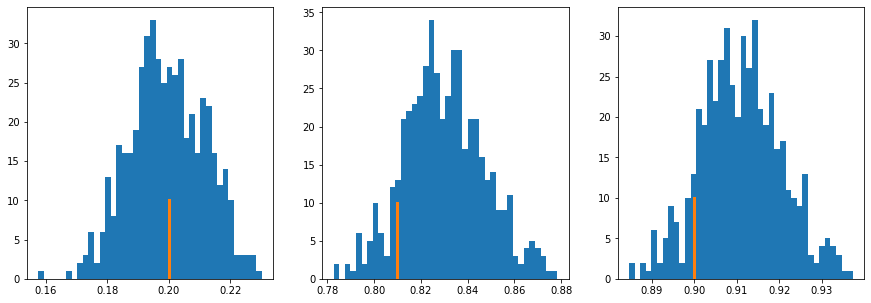

In [24]:
fig,ax = plt.subplots( ndim, 3, figsize=(3*5,ndim*5))

ymax = 10

for i in range(ndim) :
    
    if ndim > 1 :
        thisax = ax[i][0]
    else :
        thisax = ax[0]
    thisax.hist( all_mean[i], bins=40)
    thisax.plot( (true_mu[i], true_mu[i]), (0,ymax), linewidth=3 )
    
    if ndim > 1 :
        thisax = ax[i][1]
    else :
        thisax = ax[1]    
    thisax.hist( all_cov[i][i], bins=40)
    thisax.plot( (true_cov[i][i], true_cov[i][i]), (0,ymax), linewidth=3 )


    
    if ndim > 1 :
        thisax = ax[i][2]
    else :
        thisax = ax[2]    
    thisax.hist( all_rms[i], bins=40)
    thisax.plot( (true_sig[i], true_sig[i]), (0,ymax), linewidth=3 )    
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

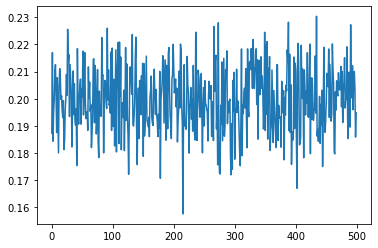

In [25]:
plt.plot(all_mean[0])
plt.show

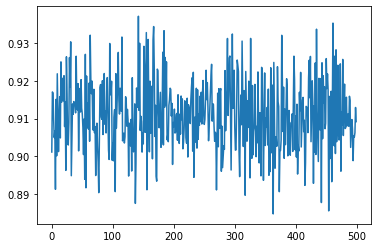

In [26]:
plt.plot(all_rms[0])

<function matplotlib.pyplot.show(close=None, block=None)>

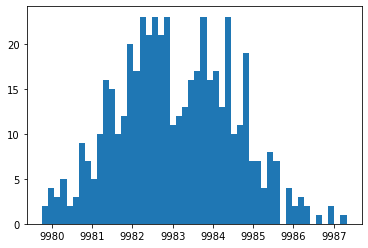

In [27]:
plt.hist( all_weight_sum, bins=50 )
plt.show

In [28]:
print( 'Weight sum RMS: %.1f' % np.sqrt( np.cov(all_weight_sum)))

Weight sum RMS: 1.4


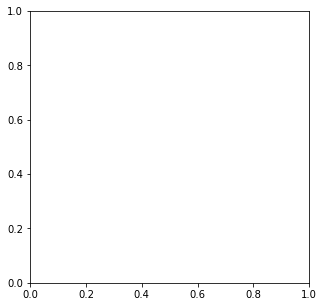

In [29]:
fig,ax = plt.subplots( ndim, ndim, figsize=(ndim*5,ndim*5))

ymax = 10

if ndim > 1 :

    for i in range(0,ndim-1) :

        for j in range(i+1,ndim) :

            k = ndim - j - 1

            ax[i][j].hist( all_rho[i,j], bins=40)

            ax[i][j].plot( (true_rho[i][k], true_rho[i][k]), (0, ymax), linewidth=3 )



    plt.show

In [30]:
print('\n')

ave_mean = np.zeros( ndim )
rms_mean = np.zeros( ndim )
rms_mean_err = np.zeros( ndim )

ave_cov = np.zeros( shape=(ndim,ndim) )
rms_cov = np.zeros( shape=(ndim,ndim) )
rms_cov_err = np.zeros( shape=(ndim,ndim) )


for fi in range(ndim) :
    
    ave_mean[fi] = np.mean( all_mean[fi] )
    ave_mean2 = np.mean( all_mean[fi]*all_mean[fi])
    rms_mean[fi] = np.sqrt( ave_mean2 - ave_mean[fi]*ave_mean[fi] )
    rms_mean_err[fi] = rms_mean[fi] / np.sqrt(2*n_samples)
    print("  feature %d  :  mean   ave %8.4f  (true %8.4f), rms %8.5f +/- %6.5f" % 
          (fi, ave_mean[fi], true_mu[fi], rms_mean[fi], rms_mean_err[fi] ))
    
print('\n')

for fi in range(ndim) :
    
    ave_rms = np.mean( all_rms[fi] )
    ave_rms2 = np.mean( all_rms[fi]*all_rms[fi])
    rms_rms = np.sqrt( ave_rms2 - ave_rms*ave_rms )
    print("  feature %d  :  RMS    ave %8.4f  (true %8.4f), rms %8.4f" % (fi, ave_rms, true_sig[fi], rms_rms ))
    
print('\n')

for fi1 in range(0,ndim-1) :
    for fi2 in range(fi1+1, ndim) :
        k = ndim - fi2 - 1
        ave_rho = np.mean( all_rho[fi1,fi2])
        ave_rho2 = np.mean( all_rho[fi1,fi2]*all_rho[fi1,fi2] )
        rms_rho = np.sqrt( ave_rho2 - ave_rho*ave_rho )
        print("  feature %d, %d  :  rho    ave %8.4f  (true %8.4f), rms %8.4f" % ( fi1, fi2, ave_rho, true_rho[fi1][k], rms_rho ))
        
print("\n")

for fi1 in range(0,ndim) :
    for fi2 in range(fi1,ndim) :
        ave_cov[fi1,fi2] = np.mean( all_cov[fi1][fi2] )
        ave_cov2 = np.mean( all_cov[fi1][fi2]*all_cov[fi1][fi2] )
        rms_cov[fi1,fi2] = np.sqrt( ave_cov2 - ave_cov[fi1,fi2]*ave_cov[fi1,fi2] )
        rms_cov_err[fi1,fi2] = rms_cov[fi1,fi2]/np.sqrt(2*n_samples)
        print("  feature %d, %d  :  cov    ave %8.4f  (true %8.4f), rms %8.5f +/- %6.5f" %
              (fi1, fi2, ave_cov[fi1,fi2], true_cov[fi1,fi2], rms_cov[fi1,fi2], rms_cov_err[fi1,fi2] ) )

print("\n")



  feature 0  :  mean   ave   0.1996  (true   0.2000), rms  0.01213 +/- 0.00038


  feature 0  :  RMS    ave   0.9110  (true   0.9000), rms   0.0094




  feature 0, 0  :  cov    ave   0.8299  (true   0.8100), rms  0.01722 +/- 0.00054




## Save the simple direct calculation results for setting fit parameter ranges from RMS.

In [31]:
with open( '%s/simple-calc-results.npy' % input_dir, 'wb' ) as f :
    np.save( f, ave_mean )
    np.save( f, rms_mean )
    np.save( f, ave_cov )
    np.save( f, rms_cov )

In [32]:
all_mean.shape

(1, 500)

In [33]:
fit_results_mean_val.shape

(1, 50)

In [34]:
n_for_plot = 0

n_boot = len(all_mean[0])
n_fit  = len(fit_results_mean_val[0])

if n_boot > n_fit :
    n_for_plot = n_fit
else :
    n_for_plot = n_boot

print('  n_boot = %d,   n_fit = %d,   n_for_plot = %d' % (n_boot, n_fit, n_for_plot))



  n_boot = 500,   n_fit = 50,   n_for_plot = 50


   0 : x axis limits:  0.173, 0.228    y axis limits  0.173, 0.228


<function matplotlib.pyplot.show(close=None, block=None)>

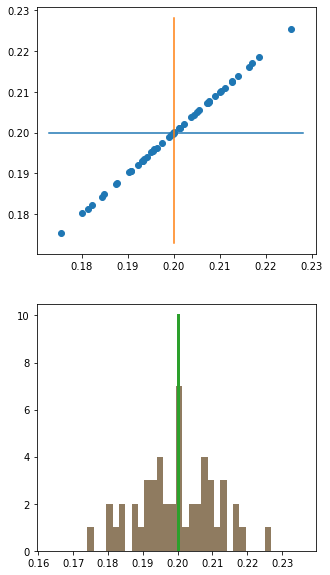

In [35]:
fig,ax = plt.subplots( 2, ndim, figsize=(5*ndim,5*2))

hbins=40
hmax = 10

for fi in range(ndim) :
    
    
    if ndim > 1 :
        thisax = ax[0][fi]
    else :
        thisax = ax[0]
        
    thisax.scatter( all_mean[fi,:n_for_plot], fit_results_mean_val[fi,:n_for_plot])
    xlow, xhigh = thisax.get_xlim()
    ylow, yhigh = thisax.get_ylim()
    print("  %2d : x axis limits:  %.3f, %.3f    y axis limits  %.3f, %.3f" % 
              (fi, xlow, xhigh, ylow, yhigh))
    thisax.plot( (xlow, xhigh), (true_mu[fi], true_mu[fi]))
    thisax.plot( (true_mu[fi], true_mu[fi]), (ylow, yhigh))
    

    if ndim > 1 :
        thisax = ax[1][fi]
    else :
        thisax = ax[1]
    
    
    thisax.hist( fit_results_mean_val[fi,:n_for_plot], bins=hbins, 
                   range=[ave_mean[fi]-3*rms_mean[fi], ave_mean[fi]+3*rms_mean[fi]])
    thisax.hist( all_mean[fi,:n_for_plot], bins=hbins, alpha=0.5,
                   range=[ave_mean[fi]-3*rms_mean[fi], ave_mean[fi]+3*rms_mean[fi]])
    thisax.plot( (true_mu[fi],true_mu[fi]),(0,hmax), linewidth=3)
    

plt.show

In [36]:
if ndim > 1 :

    fig,ax = plt.subplots( ndim, ndim, figsize=(5*ndim,5*ndim))

    for fi1 in range(ndim) :
        for fi2 in range(fi1,ndim) :
            ax[fi1][fi2].scatter( all_cov[fi1,fi2,:], fit_results_cov_val[fi1,fi2,:])
            xlow, xhigh = ax[fi1][fi2].get_xlim()
            ylow, yhigh = ax[fi1][fi2].get_ylim()
            print("  %2d, %2d : x axis limits:  %.3f, %.3f    y axis limits  %.3f, %.3f" % 
                  (fi1, fi2, xlow, xhigh, ylow, yhigh))
            ax[fi1][fi2].plot((xlow,xhigh),(true_cov[fi1][fi2], true_cov[fi1][fi2]))
            ax[fi1][fi2].plot((true_cov[fi1][fi2], true_cov[fi1][fi2]),(ylow,yhigh))

    plt.show

In [37]:
if ndim > 1 :

    fig,ax = plt.subplots( ndim, ndim, figsize=(5*ndim,5*ndim))

    hbins=40
    hmax=10

    for fi1 in range(ndim) :
        for fi2 in range(fi1,ndim) :
            ax[fi1][fi2].hist( fit_results_cov_val[fi1,fi2,:], bins=hbins, 
                             range=[ave_cov[fi1,fi2]-3*rms_cov[fi1,fi2], ave_cov[fi1,fi2]+3*rms_cov[fi1][fi2]] )
            ax[fi1][fi2].hist( all_cov[fi1,fi2,:], bins=hbins, alpha=0.5,
                             range=[ave_cov[fi1,fi2]-3*rms_cov[fi1,fi2], ave_cov[fi1,fi2]+3*rms_cov[fi1][fi2]] )
            xlow, xhigh = ax[fi1][fi2].get_xlim()
            ylow, yhigh = ax[fi1][fi2].get_ylim()
            print("  %2d, %2d : x axis limits:  %.3f, %.3f    y axis limits  %.3f, %.3f" % 
                  (fi1, fi2, xlow, xhigh, ylow, yhigh))

            ax[fi1][fi2].plot((true_cov[fi1][fi2], true_cov[fi1][fi2]),(0,hmax), linewidth=3)

    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

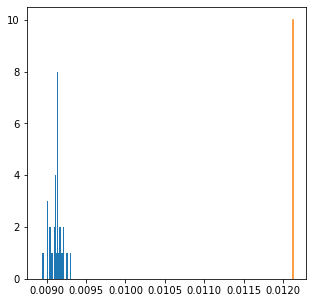

In [38]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))

hbins = 40
hmax = 10

for fi in range(ndim) :
    if ndim > 1 :
        thisax = ax[fi]
    else :
        thisax = ax
        
    thisax.hist( fit_results_mean_err[fi,:], bins=hbins )
    thisax.plot( (rms_mean[fi], rms_mean[fi]), (0,hmax) )
    
    
plt.show

In [39]:
fit_results_mean_err

array([[0.0090091 , 0.00917021, 0.00916573, 0.00909825, 0.00904834,
        0.00906733, 0.00891091, 0.00915045, 0.00900016, 0.00921754,
        0.00910948, 0.00900971, 0.0090978 , 0.00915728, 0.00904764,
        0.00924934, 0.00914129, 0.0091602 , 0.0092051 , 0.00914503,
        0.00921103, 0.00907641, 0.0091424 , 0.00896096, 0.00926344,
        0.0091657 , 0.0090328 , 0.00902905, 0.0090878 , 0.00926044,
        0.00918259, 0.00930278, 0.00894694, 0.00904819, 0.00913746,
        0.00911138, 0.00914376, 0.00913831, 0.00913921, 0.00911321,
        0.00926407, 0.00914371, 0.00912286, 0.00919165, 0.00901271,
        0.00913087, 0.00917887, 0.00911656, 0.00920145, 0.00912768]])

<function matplotlib.pyplot.show(close=None, block=None)>

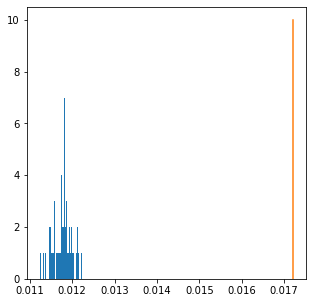

In [40]:
fig,ax = plt.subplots( 1, int((ndim*ndim+ndim)/2), figsize=(5*int((ndim*ndim+ndim)/2),5))

hbins = 40
hmax = 10

ai = 0

for fi1 in range(ndim) :
    for fi2 in range(fi1,ndim) :
        
        if ndim > 1 :
            thisax = ax[ai]
        else :
            thisax = ax

        thisax.hist( fit_results_cov_err[fi1,fi2,:], bins=hbins )
        thisax.plot( (rms_cov[fi1,fi2], rms_cov[fi1,fi2]), (0,hmax) )
        ai = ai + 1
    
plt.show

## Bootstrap error compared with average fit error

In [41]:
print('\n')

for fi in range(ndim) :
    
    print("  mean %d:  rms bootstraps %8.4f,  ave fit err %8.4f    ratio %6.2f |  val. %6.3f, true %6.3f, diff %6.3f"
         % (fi, rms_mean[fi], ave_fit_err_mean[fi], rms_mean[fi] / ave_fit_err_mean[fi], ave_mean[fi], true_mu[fi], ave_mean[fi]-true_mu[fi] ))
    
print('\n')

for fi1 in range(ndim) :
    for fi2 in range(fi1,ndim) :
        print("  cov%d%d:   rms bootstraps %8.4f,  ave fit err %8.4f    ratio %6.2f |  val. %6.3f, true %6.3f, diff %6.3f"
              % (fi1, fi2, rms_cov[fi1,fi2], ave_fit_err_cov[fi1,fi2], rms_cov[fi1,fi2]/ave_fit_err_cov[fi1,fi2], ave_cov[fi1,fi2], true_cov[fi1,fi2], ave_cov[fi1,fi2]-true_cov[fi1,fi2]) )
        

print('\n\n\n')

for fi in range(ndim) :
    
    print("  mean %d:  rms samples %8.5f +/- %6.5f,  ave fit err %8.5f    ratio %6.2f +/- %4.2f "
         % (fi, rms_mean[fi], rms_mean_err[fi],
            ave_fit_err_mean[fi], 
            rms_mean[fi] / ave_fit_err_mean[fi],
            rms_mean_err[fi] / ave_fit_err_mean[fi]))

for fi1 in range(ndim) :
    for fi2 in range(fi1,ndim) :
        print("  cov%d%d:   rms samples %8.5f +/- %6.5f,  ave fit err %8.5f    ratio %6.2f +/- %4.2f "
              % (fi1, fi2, rms_cov[fi1,fi2], rms_cov_err[fi1,fi2],
                 ave_fit_err_cov[fi1,fi2], 
                 rms_cov[fi1,fi2]/ave_fit_err_cov[fi1,fi2], rms_cov_err[fi1,fi2]/ave_fit_err_cov[fi1,fi2] ) )
        
print('\n')



  mean 0:  rms bootstraps   0.0121,  ave fit err   0.0091    ratio   1.33 |  val.  0.200, true  0.200, diff -0.000


  cov00:   rms bootstraps   0.0172,  ave fit err   0.0118    ratio   1.46 |  val.  0.830, true  0.810, diff  0.020




  mean 0:  rms samples  0.01213 +/- 0.00038,  ave fit err  0.00912    ratio   1.33 +/- 0.04 
  cov00:   rms samples  0.01722 +/- 0.00054,  ave fit err  0.01178    ratio   1.46 +/- 0.05 




## Look for outliers in feature coords and weights

In [42]:
for fi in range( ndim ) :
    
    print( "  feature %2d :  min %12f   max %12f " % ( fi, np.min(train_pts[:,fi]), np.max(train_pts[:,fi])) )

  feature  0 :  min    -5.161667   max     4.271983 


In [43]:
for si in range( n_samples ) :
    
    max_delta_mean = 0
    for fi in range(ndim) :
        delta = fit_results_mean_val[fi,si] - all_mean[fi,si] 
        if np.abs(delta) > max_delta_mean :
            max_delta_mean = delta
        
    print("  %3d : weight range  %12g  to %12f ,   max delta mean  %12f"
         % (si, all_weight_min[si], all_weight_max[si], max_delta_mean ))

    0 : weight range    9.9845e-06  to     0.890987 ,   max delta mean     -0.000014
    1 : weight range   4.99047e-06  to     0.786808 ,   max delta mean      0.000029
    2 : weight range   9.98407e-06  to     0.344297 ,   max delta mean     -0.000030
    3 : weight range   9.98362e-06  to     1.358327 ,   max delta mean      0.000194
    4 : weight range   4.99139e-06  to     0.219544 ,   max delta mean      0.000009
    5 : weight range    4.9908e-06  to     0.282987 ,   max delta mean     -0.000012
    6 : weight range   4.99116e-06  to     0.871290 ,   max delta mean     -0.000008
    7 : weight range    9.9822e-06  to     0.521107 ,   max delta mean     -0.000166
    8 : weight range   9.98405e-06  to     0.512925 ,   max delta mean      0.000007
    9 : weight range   9.98232e-06  to     0.697062 ,   max delta mean      0.000004
   10 : weight range   9.98386e-06  to     0.724996 ,   max delta mean     -0.000146
   11 : weight range   9.98466e-06  to     2.375180 ,   max delta

IndexError: index 50 is out of bounds for axis 1 with size 50

## Look deeper into bootstrap with an outlier

In [ ]:
si = 35

fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, si)
            
with open(fname,'rb') as f :
            
    final_push_weights_scaled = np.load(f)

In [ ]:
fig,ax = plt.subplots( 1, 2, figsize=(2*7,5))

hbins = 60
ax[0].hist( np.log10(final_push_weights_scaled), bins=hbins)
ax[1].hist( final_push_weights_scaled, bins=hbins)
ax[1].set_yscale('log')

plt.show

In [ ]:
selection_mask = final_push_weights_scaled < 100
train_pts_sel = train_pts[ selection_mask ]
weights_sel = final_push_weights_scaled[ selection_mask ]

print(" number of events before selection  %d" % len(train_pts))
print(" number of events passing selection %d" % len(train_pts_sel))
print(" max weight before selection : %f" % np.max(final_push_weights_scaled))
print(" max weight passing selection: %f" % np.max(weights_sel))

In [ ]:
for fi in range( ndim ) :
    
    fit_mean = fit_results_mean_val[fi,si]
    mean_all_evts = all_mean[fi,si]
    mean_sel = ( np.sum( weights_sel * train_pts_sel[:,fi]) ) / ( np.sum( weights_sel ) )
    mean_diff = mean_sel - mean_all_evts
    print(" %2d :  fit mean  %10f   mean all  %10f   selected  %10f   diff %10f  fit diff %10f" % 
          ( fi, fit_mean, mean_all_evts, mean_sel, mean_diff, (mean_sel-fit_mean) ))

## Look at outlier point

In [ ]:
train_pts_antisel = train_pts[ final_push_weights_scaled > 100 ]
train_pts_antisel.shape

In [ ]:
for fi in range( ndim ) :
    
    sigma = np.sqrt(ave_cov[fi,fi])
    
    print(" %2d :  val %10f   mean %10f   sigma %10f  diff/sigma %10f" %
          (fi, train_pts_antisel[0,fi], ave_mean[fi], sigma, (train_pts_antisel[0,fi]-ave_mean[fi])/sigma )
         )

In [ ]:
true_sig

## Calculate the true weights and compare with unfolding weights